**掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**import 套件**

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
from IPython.display import display, clear_output
twfont1=plt_font.FontProperties(fname="drive/My Drive/DL_CLASS/kaiu.ttf")

**整理特徵資料集和分類標示資料集**

In [ ]:
#data_x1為花萼長度
data_x1 = np.array([5.1 ,6.7 ,4.9 ,4.9 ,6.1 ,7.3 ,4.7 ,6.4 ,6.7 ,4.6 ,5.7 ,6.5 ,5.0 ,5.5 ,6.4 ,5.4 ,6.8 ,6.8 ,4.6 ,6.6 ,5.7 ,5.0 ,5.6 ,5.8 ,4.4 ,5.8 ,6.4 ,4.9 ,6.2 ,6.5 ,5.4 ,5.5 ,7.7 ,4.8 ,6.0 ,7.7 ,4.8 ,6.0 ,6.0 ,4.3 ,6.1 ,6.9 ,5.8 ,5.9 ,5.6 ,5.7 ,6.3 ,7.7 ,5.4 ,6.7 ,6.3 ,5.1 ,5.6 ,6.7 ,5.7 ,5.6 ,7.2 ,5.1 ,6.1 ,6.2 ,5.4 ,5.9 ,6.1 ,5.1 ,6.0 ,6.4 ,4.6 ,5.0 ,7.2 ,5.1 ,6.3 ,7.4 ,4.8 ,5.2 ,7.9 ,5.0 ,6.6 ,6.4 ,5.0 ,4.9 ,6.3 ,5.2 ,5.7 ,7.1 ,5.2 ,6.5 ,5.8 ,4.7 ,6.9 ,7.2 ,4.8 ,6.4 ,6.3 ,5.4 ,7.0 ,6.3 ,5.5 ,5.8 ,6.5 ,7.6 ])
#data_x2為花萼寬度
data_x2 = np.array([3.5 ,3.0 ,2.5 ,3.0 ,2.8 ,2.9 ,3.2 ,2.9 ,2.5 ,3.1 ,2.6 ,3.2 ,3.6 ,2.4 ,2.7 ,3.9 ,2.8 ,3.0 ,3.4 ,3.0 ,2.5 ,3.4 ,2.5 ,2.8 ,2.9 ,2.7 ,3.2 ,3.1 ,2.2 ,3.0 ,3.7 ,2.4 ,3.8 ,3.4 ,2.9 ,2.6 ,3.0 ,2.7 ,2.2 ,3.0 ,2.8 ,3.2 ,4.0 ,3.2 ,2.8 ,4.4 ,2.5 ,2.8 ,3.9 ,3.1 ,2.7 ,3.5 ,3.0 ,3.3 ,3.8 ,2.9 ,3.2 ,3.8 ,2.9 ,2.8 ,3.4 ,3.0 ,3.0 ,3.7 ,2.2 ,2.8 ,3.6 ,2.0 ,3.0 ,3.3 ,3.3 ,2.8 ,3.4 ,2.7 ,3.8 ,3.0 ,2.9 ,2.8 ,3.4 ,2.4 ,2.9 ,3.5 ,2.8 ,3.0 ,3.4 ,2.8 ,2.7 ,3.2 ,3.1 ,3.6 ,3.1 ,3.2 ,3.3 ,3.4 ,3.2 ,2.8 ,2.3 ,2.7 ,3.0 ,3.0 ])
#data_x3為花瓣長度
data_x3 = np.array([1.4 ,5.0 ,4.5 ,1.4 ,4.0 ,6.3 ,1.3 ,4.3 ,5.8 ,1.5 ,3.5 ,5.1 ,1.4 ,3.7 ,5.3 ,1.7 ,4.8 ,5.5 ,1.4 ,4.4 ,5.0 ,1.5 ,3.9 ,5.1 ,1.4 ,4.1 ,5.3 ,1.5 ,4.5 ,5.5 ,1.5 ,3.8 ,6.7 ,1.6 ,4.5 ,6.9 ,1.4 ,5.1 ,5.0 ,1.1 ,4.7 ,5.7 ,1.2 ,4.8 ,4.9 ,1.5 ,4.9 ,6.7 ,1.3 ,4.4 ,4.9 ,1.4 ,4.5 ,5.7 ,1.7 ,3.6 ,6.0 ,1.5 ,4.7 ,4.8 ,1.7 ,4.2 ,4.9 ,1.5 ,4.0 ,5.6 ,1.0 ,3.5 ,5.8 ,1.7 ,4.7 ,6.1 ,1.9 ,3.9 ,6.4 ,1.6 ,4.6 ,5.6 ,1.6 ,3.3 ,5.6 ,1.5 ,4.5 ,5.9 ,1.4 ,4.6 ,5.1 ,1.6 ,4.9 ,6.1 ,1.6 ,4.5 ,6.0 ,1.5 ,4.7 ,5.1 ,4.0 ,3.9 ,5.8 ,6.6 ])
#data_x4為花瓣寬度
data_x4 = np.array([0.2 ,1.7 ,1.7 ,0.2 ,1.3 ,1.8 ,0.2 ,1.3 ,1.8 ,0.2 ,1.0 ,2.0 ,0.2 ,1.0 ,1.9 ,0.4 ,1.4 ,2.1 ,0.3 ,1.4 ,2.0 ,0.2 ,1.1 ,2.4 ,0.2 ,1.0 ,2.3 ,0.1 ,1.5 ,1.8 ,0.2 ,1.1 ,2.2 ,0.2 ,1.5 ,2.3 ,0.1 ,1.6 ,1.5 ,0.1 ,1.2 ,2.3 ,0.2 ,1.8 ,2.0 ,0.4 ,1.5 ,2.0 ,0.4 ,1.4 ,1.8 ,0.3 ,1.5 ,2.1 ,0.3 ,1.3 ,1.8 ,0.3 ,1.4 ,1.8 ,0.2 ,1.5 ,1.8 ,0.4 ,1.0 ,2.1 ,0.2 ,1.0 ,1.6 ,0.5 ,1.6 ,1.9 ,0.2 ,1.4 ,2.0 ,0.2 ,1.3 ,2.2 ,0.4 ,1.0 ,1.8 ,0.2 ,1.3 ,2.1 ,0.2 ,1.5 ,1.9 ,0.2 ,1.5 ,2.5 ,0.2 ,1.5 ,2.5 ,0.4 ,1.4 ,1.5 ,1.3 ,1.2 ,2.2 ,2.1 ])
#標示0為山鳶尾(setosa)、標示1為雜色鳶尾(versicolor)、標示2為維吉尼亞鳶尾(virginica)
data_y  = np.array([0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1   ,2   ,0   ,1   ,2   ,0   ,1   ,2   ,0   ,1   ,2   ,0   ,1   ,2   ,0   ,1   ,2   ,0   ,1   ,2   ,1   ,1   ,2   ,2   ])

**將分類標示不用做one_hot_encode**

In [ ]:
mtx_train_y=torch.tensor(data_y[:70])
mtx_valid_y=torch.tensor(data_y[70:])

**特徵縮放**

In [ ]:
def standardize(data):
  mu = data.mean(axis=0)
  sigma = data.std(axis=0)
  return (data - mu) / sigma

**產生特徵資料X矩陣**

In [ ]:
#垂直堆疊x1、x2、x3、x4再轉置組成X矩陣
def Xmatrix(x1,x2,x3,x4):
  return np.vstack([x1,x2,x3,x4]).T
#將訓練集資料和驗證集資料的自變數轉成X矩陣
mtx_train_x=torch.tensor(standardize(Xmatrix(data_x1,data_x2,data_x3,data_x4))[:70]).float()
mtx_valid_x=torch.tensor(standardize(Xmatrix(data_x1,data_x2,data_x3,data_x4))[70:]).float()
mtx_train_x.shape

torch.Size([70, 4])

**繼承nn.Module建構神經網路**

In [ ]:
from torch import optim,nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # 使用 nn.Parameter 來表示Weight為參數
        self.hidden1 = nn.Linear(4, 50)
        self.hidden2 = nn.Linear(50, 3)
        self.ReLU = nn.ReLU()
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        # 計算我們的輸出，也就是預測
        hidden1_out=self.ReLU(self.hidden1(x))
        hidden2_out=self.LogSoftmax(self.hidden2(hidden1_out))

        return hidden2_out
model=Network()

**設定學習率和權重更新次數**

In [ ]:
#設定學習率
ETA=0.1
#紀錄訓練時的Loss
Loss_log=[]
#設定使用的損失函數
LossFun=nn.NLLLoss()
#設定使用的優化器
optimizer = optim.SGD(model.parameters(), lr=ETA)

**開始訓練模型**

In [ ]:
for epoch in range(1000):
    train_y_hat = model(mtx_train_x)
    Loss = LossFun(train_y_hat,mtx_train_y)
    Loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print("訓練回合：",epoch+1,"損失函數：",Loss.detach().numpy())
    Loss_log.append(Loss.detach().numpy())
    clear_output(wait=True)

訓練回合： 1000 損失函數： 0.04987794


**觀察Loss值隨訓練次數的變化**

[array(1.209498, dtype=float32), array(1.0371016, dtype=float32), array(0.9092591, dtype=float32), array(0.81443286, dtype=float32), array(0.7429668, dtype=float32), array(0.68778783, dtype=float32), array(0.64402634, dtype=float32), array(0.6084595, dtype=float32), array(0.5789154, dtype=float32), array(0.5539118, dtype=float32), array(0.5324253, dtype=float32), array(0.51368266, dtype=float32), array(0.49714988, dtype=float32), array(0.4824287, dtype=float32), array(0.46921426, dtype=float32), array(0.45725435, dtype=float32), array(0.44636565, dtype=float32), array(0.4363893, dtype=float32), array(0.42720208, dtype=float32), array(0.41869837, dtype=float32), array(0.41080233, dtype=float32), array(0.40344855, dtype=float32), array(0.39657015, dtype=float32), array(0.3901161, dtype=float32), array(0.3840359, dtype=float32), array(0.3782934, dtype=float32), array(0.37286633, dtype=float32), array(0.36772326, dtype=float32), array(0.36282876, dtype=float32), array(0.3581624, dtype=floa

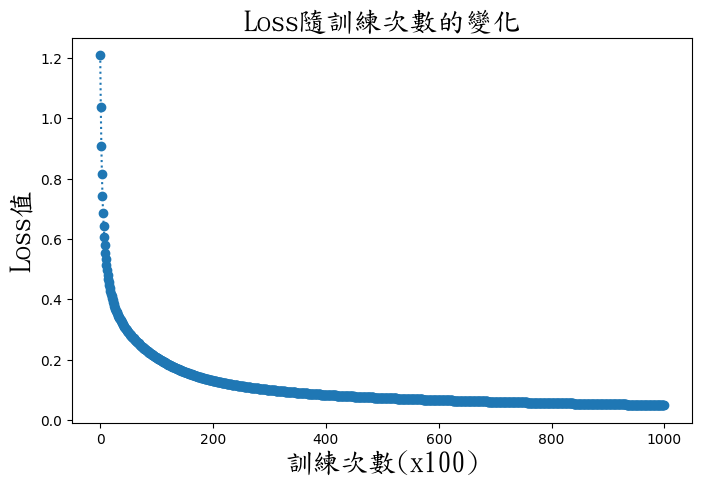

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20)
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20)
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
print(Loss_log)
plt.plot(Loss_log,":o")

plt.show()

**計算對驗證集資料的分類準確度**



In [ ]:
with torch.no_grad():
    valid_y_hat = model(mtx_valid_x)
Predi_Y=torch.argmax(valid_y_hat,1)
Right=0
for i in range(len(mtx_valid_x)):
  if Predi_Y[i]==mtx_valid_y[i]:
    Right+=1
print("辨識正確率為：",100*Right/len(mtx_valid_x),"%")

辨識正確率為： 96.66666666666667 %
